In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import astropy.units as u 
import math

# FFT Beamforming Demonstration

Generate some parameters. Choose a random frequency in the CHORD band (600 MHz). Working with a 16 element array in 1D, spaced with lambda/2 spacing. 

In [2]:
c = 300e6 * u.m / u.s  
f = 600 * u.MHz  
l = c / f  
l = l.to('meter')
spacing = l / 2  
num_antennas = 16  

Generate an array from these parameters and plot it

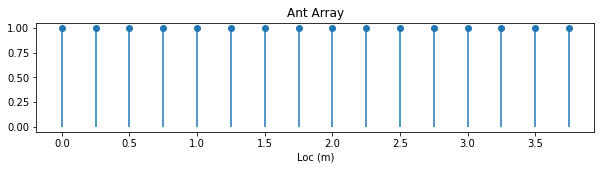

In [3]:
pos = np.arange(num_antennas) * spacing.value

plt.figure(figsize=(10, 2))
plt.stem(pos, np.ones_like(pos),  basefmt=" ", use_line_collection=True)
plt.title("Ant Array")
plt.xlabel("Loc (m)")
plt.show()

set up some helpful functions

In [4]:
def phase_term(position, angle):
    '''
    Calculate the phase term at each antenna based on the antenna position 
    and the source angle. The first antenna is designated position 0 so it will
    always get 0 in return. This means all antenans are reference to the first 
    antenna.
    '''
    return (2 * np.pi * position * np.sin(angle)) / l.value

def steering_angle(beam):
    '''
    Calculate the steering angle for the beam centers based on the frequency,
    antenna spacing, and number of antennas. The input is the number of the beam you
    are looking at. For 16 beams this ranges -8,7). 
    '''
    return(math.asin(l*beam/(num_antennas*spacing)))

Calculate the source angle to put the source at exactly bin center of beam 1. Calculated the phase term for each antenna for the source, and plot the magnitude and phase response of the array to the source. Can play around with the steering angle to see what it looks like. For 16 beams range from -8 to 7. 

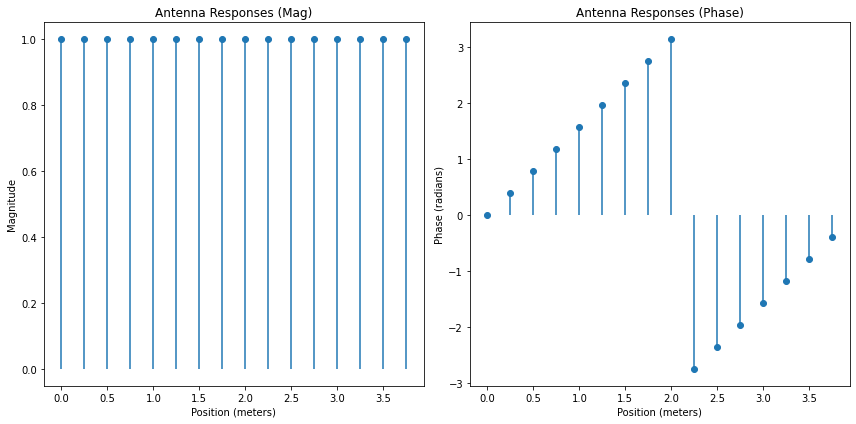

In [5]:
angle = steering_angle(1)

phases = np.array([phase_term(antenna, angle) for antenna in pos])
single_source = np.exp(1j * phases)

magnitude = np.abs(single_source)
phase = np.angle(single_source)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.stem(pos, magnitude, basefmt=" ", use_line_collection=True)
plt.title("Antenna Responses (Mag)")
plt.xlabel("Position (meters)")
plt.ylabel("Magnitude")

plt.subplot(1, 2, 2)
plt.stem(pos, phase, basefmt=" ", use_line_collection=True)
plt.title("Antenna Responses (Phase)")
plt.xlabel("Position (meters)")
plt.ylabel("Phase (radians)")

plt.tight_layout()
plt.show()

Now take our FFT and see if we can identify which beam out source is in. Since we told the code to put it at the steering angle for the center for beam 1, we should see it in beam 1. Good, we do. 

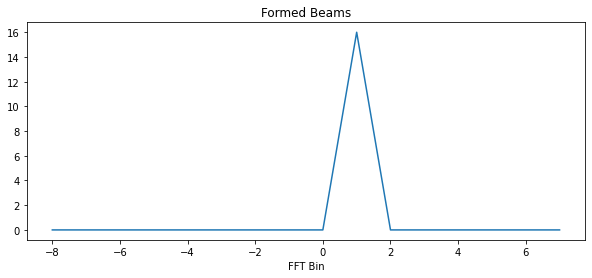

In [6]:
ns = np.array([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7])
sky = np.abs(np.fft.fftshift(np.fft.fft(single_source)))

plt.figure(figsize=(10, 4))
plt.plot(ns,sky)
plt.title("Formed Beams")
plt.xlabel("FFT Bin")
plt.show()

Now let's generate 16 sources exactly at beam center for each of the 16 beams and make sure we get 16 delta functions when we fourier transform. 

Text(0, 0.5, 'FFT amplitude')

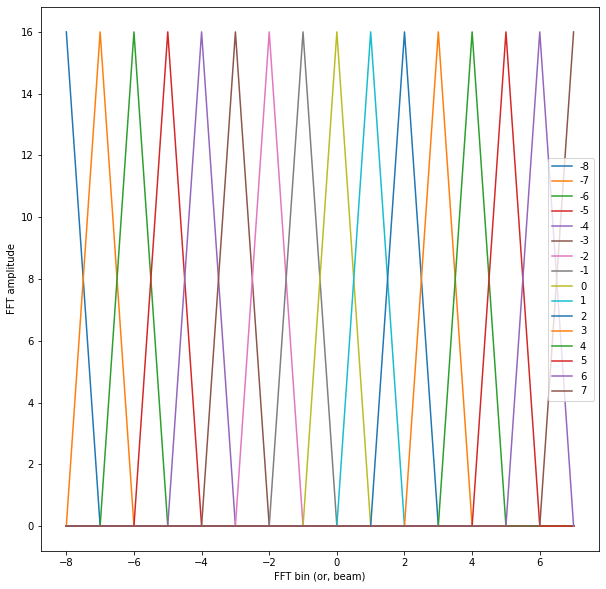

In [7]:
ns = np.array([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7])


angle_arr = []
for n in ns:
    ang = steering_angle(n)
    angle_arr.append(ang)

fig = plt.figure(figsize=(10,10))

i=0
for angle in angle_arr:
    phases = np.array([phase_term(antenna, angle) for antenna in pos])
    single_source = np.exp(1j * phases)
    sky = np.abs(np.fft.fftshift(np.fft.fft(single_source)))
    plt.plot(ns, sky, label=ns[i])
    i+=1

plt.legend()
plt.xlabel('FFT bin (or, beam)')
plt.ylabel('FFT amplitude')

generate a finer grid of source from -1 to 1 radian to show the nasty ringing 

Text(0, 0.5, 'FFT amplitude')

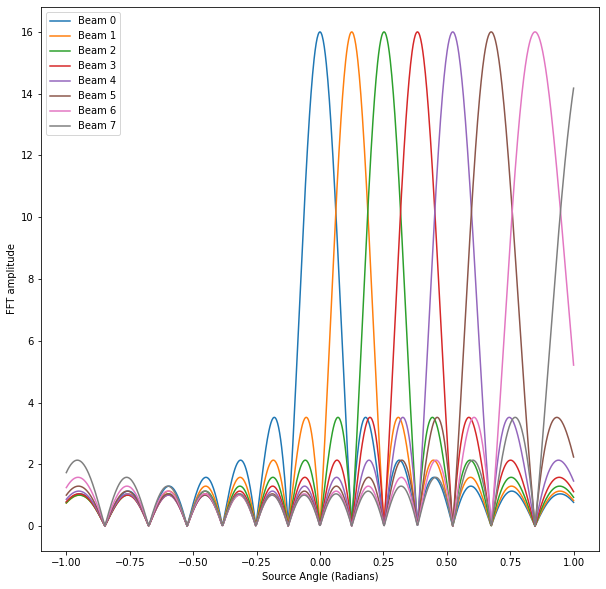

In [8]:
ns = np.array([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7])


angle_arr = np.linspace(-1,1,1000)

fig = plt.figure(figsize=(10,10))

i=0

beam0 = []
beam1 = []
beam2 = []
beam3 = []
beam4 = []
beam5 = []
beam6 = []
beam7 = []

for angle in angle_arr:
    phases = np.array([phase_term(antenna, angle) for antenna in pos])
    single_source = np.exp(1j * phases)
    sky = np.abs(np.fft.fftshift(np.fft.fft(single_source)))
    beam0.append(sky[8])
    beam1.append(sky[9])
    beam2.append(sky[10])
    beam3.append(sky[11])
    beam4.append(sky[12])
    beam5.append(sky[13])
    beam6.append(sky[14])
    beam7.append(sky[15])
    i+=1
    
plt.plot(angle_arr, beam0, label = 'Beam 0')
plt.plot(angle_arr, beam1, label = 'Beam 1')
plt.plot(angle_arr, beam2, label = 'Beam 2')
plt.plot(angle_arr, beam3, label = 'Beam 3')
plt.plot(angle_arr, beam4, label = 'Beam 4')
plt.plot(angle_arr, beam5, label = 'Beam 5')
plt.plot(angle_arr, beam6, label = 'Beam 6')
plt.plot(angle_arr, beam7, label = 'Beam 7')
plt.legend()
plt.xlabel('Source Angle (Radians)')
plt.ylabel('FFT amplitude')

change the spacing to 2 lambda instead of lambda/2 to get some gross aliasing

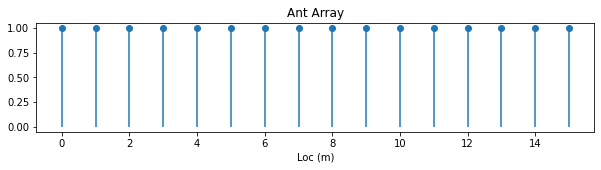

In [9]:
c = 300e6 * u.m / u.s  
f = 600 * u.MHz  
l = c / f  
l = l.to('meter')
spacing = 2*l
num_antennas = 16  

pos = np.arange(num_antennas) * spacing.value

plt.figure(figsize=(10, 2))
plt.stem(pos, np.ones_like(pos),  basefmt=" ", use_line_collection=True)
plt.title("Ant Array")
plt.xlabel("Loc (m)")
plt.show()

Text(0, 0.5, 'FFT amplitude')

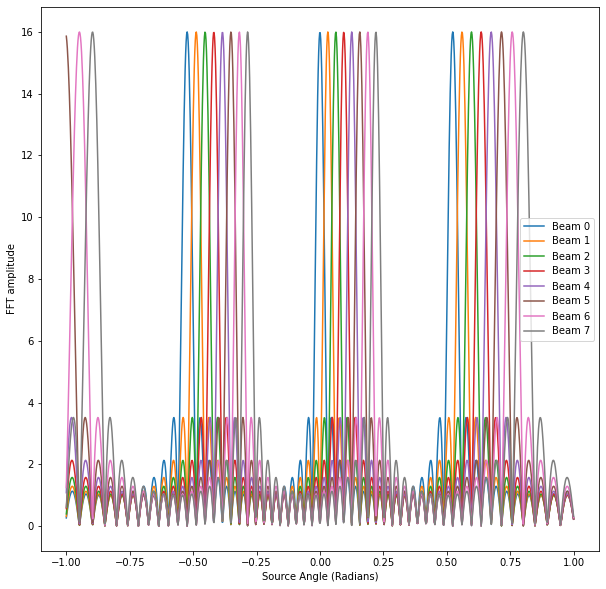

In [10]:
ns = np.array([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7])


angle_arr = np.linspace(-1,1,1000)

fig = plt.figure(figsize=(10,10))

i=0

beam0 = []
beam1 = []
beam2 = []
beam3 = []
beam4 = []
beam5 = []
beam6 = []
beam7 = []

for angle in angle_arr:
    phases = np.array([phase_term(antenna, angle) for antenna in pos])
    single_source = np.exp(1j * phases)
    sky = np.abs(np.fft.fftshift(np.fft.fft(single_source)))
    beam0.append(sky[8])
    beam1.append(sky[9])
    beam2.append(sky[10])
    beam3.append(sky[11])
    beam4.append(sky[12])
    beam5.append(sky[13])
    beam6.append(sky[14])
    beam7.append(sky[15])
    i+=1
    
plt.plot(angle_arr, beam0, label = 'Beam 0')
plt.plot(angle_arr, beam1, label = 'Beam 1')
plt.plot(angle_arr, beam2, label = 'Beam 2')
plt.plot(angle_arr, beam3, label = 'Beam 3')
plt.plot(angle_arr, beam4, label = 'Beam 4')
plt.plot(angle_arr, beam5, label = 'Beam 5')
plt.plot(angle_arr, beam6, label = 'Beam 6')
plt.plot(angle_arr, beam7, label = 'Beam 7')
plt.legend()
plt.xlabel('Source Angle (Radians)')
plt.ylabel('FFT amplitude')

Rerun the same simple simulations, but change the antenna spacing to be the CHIME spacing and run over the CHORD frequency space. We should see the steering angle for beam center move as a function of frequency. Can't quite get down to 400 with this spacing at the beams hit 90 degrees.

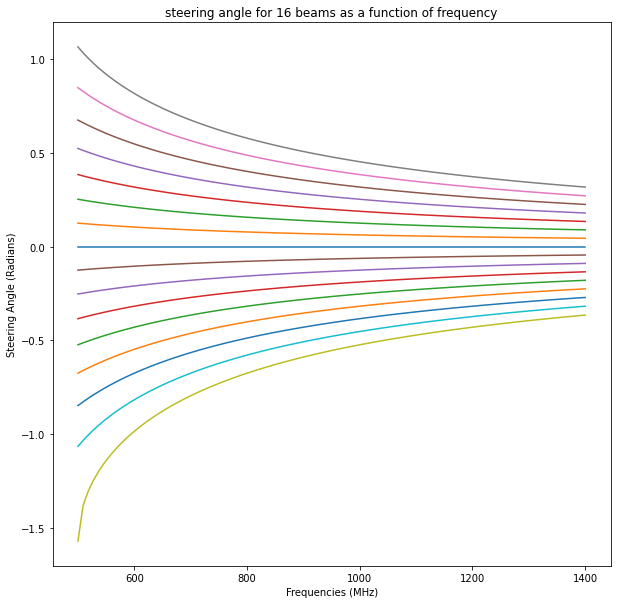

In [11]:
def phase_term(position, angle):
    return (2 * np.pi * position * np.sin(angle)) / l.value

def steering_angle(ang):
    return(math.asin(l*ang/(num_antennas*spacing)))   


freqs = np.linspace(500,1400,100)

results = np.zeros((len(freqs),16))

i=0

for f in freqs:
    f=f*u.MHz
    c = 300e6 * u.m / u.s  
    l = c / f  
    l = l.to('meter')
    spacing = .3*u.meter
    num_antennas = 16  

    pos = np.arange(num_antennas) * spacing.value
    
    ns = np.array([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7])


    angle_arr = []
    
    j=0
    for n in ns:
        ang = ns[n]
        ang = steering_angle(ang)
        results[i,j] = ang
        j+=1
        
    i+=1
    
fig = plt.figure(figsize=(10,10))

for row in range(16):
    plt.plot(freqs,results[:,row])

plt.title('steering angle for 16 beams as a function of frequency')
plt.xlabel('Frequencies (MHz)')
plt.ylabel('Steering Angle (Radians)')
plt.show()

plot in degrees because that's more intuitive for me. To do: I think this formula for the steering angle doesn't work once the small angle approximation fails. I should check this.

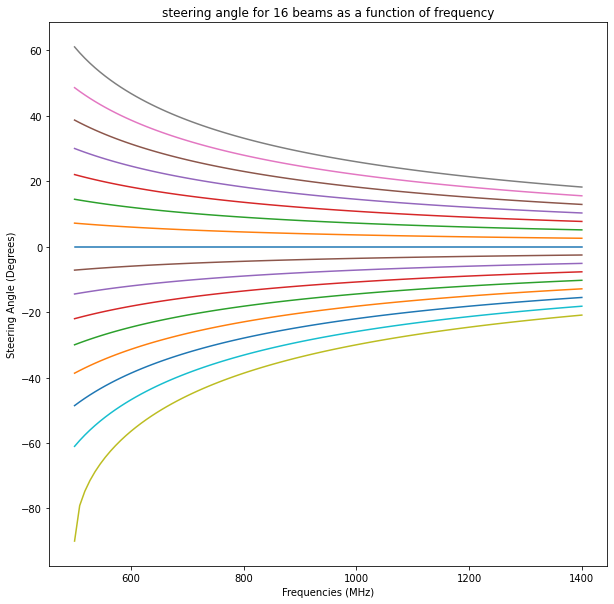

In [12]:
def phase_term(position, angle):
    return (2 * np.pi * position * np.sin(angle)) / l.value

def steering_angle(ang):
    return(math.asin(l*ang/(num_antennas*spacing)))   


freqs = np.linspace(500,1400,100)

results = np.zeros((len(freqs),16))

i=0

for f in freqs:
    f=f*u.MHz
    c = 300e6 * u.m / u.s  
    l = c / f  
    l = l.to('meter')
    spacing = .3*u.meter
    num_antennas = 16  

    pos = np.arange(num_antennas) * spacing.value
    
    ns = np.array([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7])


    angle_arr = []
    
    j=0
    for n in ns:
        ang = ns[n]
        ang = steering_angle(ang)
        ang = math.degrees(ang)
        results[i,j] = ang
        j+=1
        
    i+=1
    
fig = plt.figure(figsize=(10,10))

for row in range(16):
    plt.plot(freqs,results[:,row])

plt.title('steering angle for 16 beams as a function of frequency')
plt.xlabel('Frequencies (MHz)')
plt.ylabel('Steering Angle (Degrees)')
plt.show()

put a larger spacing between antennas. should see the beams move closer together.

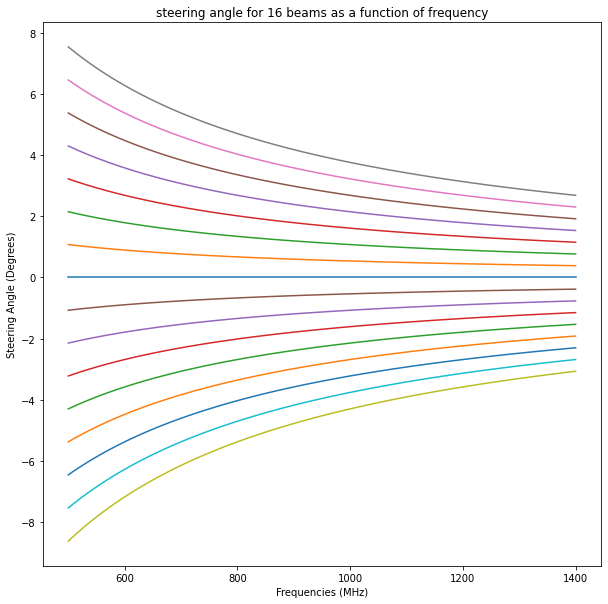

In [13]:

freqs = np.linspace(500,1400,100)

results = np.zeros((len(freqs),16))

i=0

for f in freqs:
    f=f*u.MHz
    c = 300e6 * u.m / u.s  
    l = c / f  
    l = l.to('meter')
    spacing = 2*u.meter
    num_antennas = 16  

    pos = np.arange(num_antennas) * spacing.value
    
    ns = np.array([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7])


    angle_arr = []
    
    j=0
    for n in ns:
        ang = ns[n]
        ang = steering_angle(ang)
        ang = math.degrees(ang)
        results[i,j] = ang
        j+=1
        
    i+=1
    
fig = plt.figure(figsize=(10,10))

for row in range(16):
    plt.plot(freqs,results[:,row])

plt.title('steering angle for 16 beams as a function of frequency')
plt.xlabel('Frequencies (MHz)')
plt.ylabel('Steering Angle (Degrees)')
plt.show()

Add more antennas with the original spacing. Should see the beams span the same space as the original but with finer resolution.

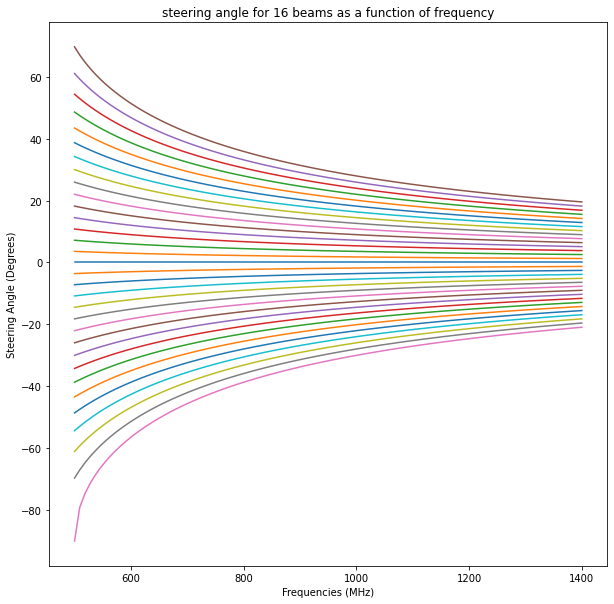

In [14]:

freqs = np.linspace(500,1400,100)

results = np.zeros((len(freqs),32))

i=0

for f in freqs:
    f=f*u.MHz
    c = 300e6 * u.m / u.s  
    l = c / f  
    l = l.to('meter')
    spacing = .3*u.meter
    num_antennas = 32 

    pos = np.arange(num_antennas) * spacing.value
    
    ns = np.linspace(-16,15,32,dtype=int)
    
    angle_arr = []
    
    j=0
    for n in ns:
        ang = ns[n]
        ang = steering_angle(ang)
        ang = math.degrees(ang)
        results[i,j] = ang
        j+=1
        
    i+=1
    
fig = plt.figure(figsize=(10,10))

for row in range(32):
    plt.plot(freqs,results[:,row])

plt.title('steering angle for 16 beams as a function of frequency')
plt.xlabel('Frequencies (MHz)')
plt.ylabel('Steering Angle (Degrees)')
plt.show()

Less antennas, same spacing. Should see the same span but less fine resolution

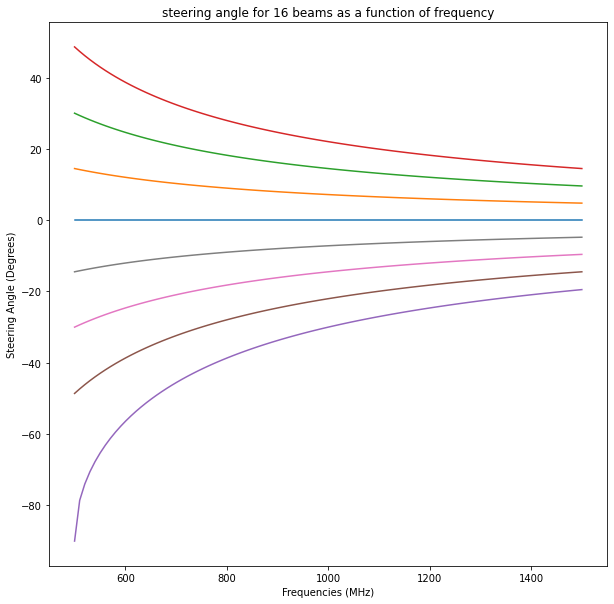

In [15]:
freqs = np.linspace(500,1500,100)

results = np.zeros((len(freqs),32))

i=0

for f in freqs:
    f=f*u.MHz
    c = 300e6 * u.m / u.s  
    l = c / f  
    l = l.to('meter')
    spacing = .3*u.meter
    num_antennas = 8

    pos = np.arange(num_antennas) * spacing.value
    
    ns = np.linspace(-4,3,8,dtype=int)
    
    angle_arr = []
    
    j=0
    for n in ns:
        ang = ns[n]
        ang = steering_angle(ang)
        ang = math.degrees(ang)
        results[i,j] = ang
        j+=1
        
    i+=1
    
fig = plt.figure(figsize=(10,10))

for row in range(8):
    plt.plot(freqs,results[:,row])

plt.title('steering angle for 16 beams as a function of frequency')
plt.xlabel('Frequencies (MHz)')
plt.ylabel('Steering Angle (Degrees)')
plt.show()

Plot for one frequency to see the beam spacing more clearly

Text(0, 0.5, 'Steering Angle(Degrees)')

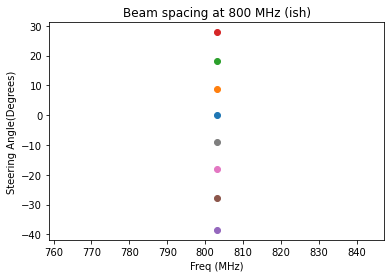

In [16]:
for row in range(8):
    plt.scatter(freqs[30],results[30,row])
plt.title('Beam spacing at 800 MHz (ish)')
plt.xlabel('Freq (MHz)')
plt.ylabel('Steering Angle(Degrees)')

Look through a single beam